# Metody zespołowe, Ensemble
Jest to technika, która łączy predykcje wielu modeli (tzw. klasyfikatorów słabych lub bazowych) w celu uzyskania lepszych wyników niż te, które można by osiągnąć za pomocą pojedynczego modelu.

## Ensemble Learning

### Dlaczego Ensemble?
- *Wisdom of the crowd*
- Często używane do porównania wyników
- Równoległe
- Sekwencyjne

### Głosowanie
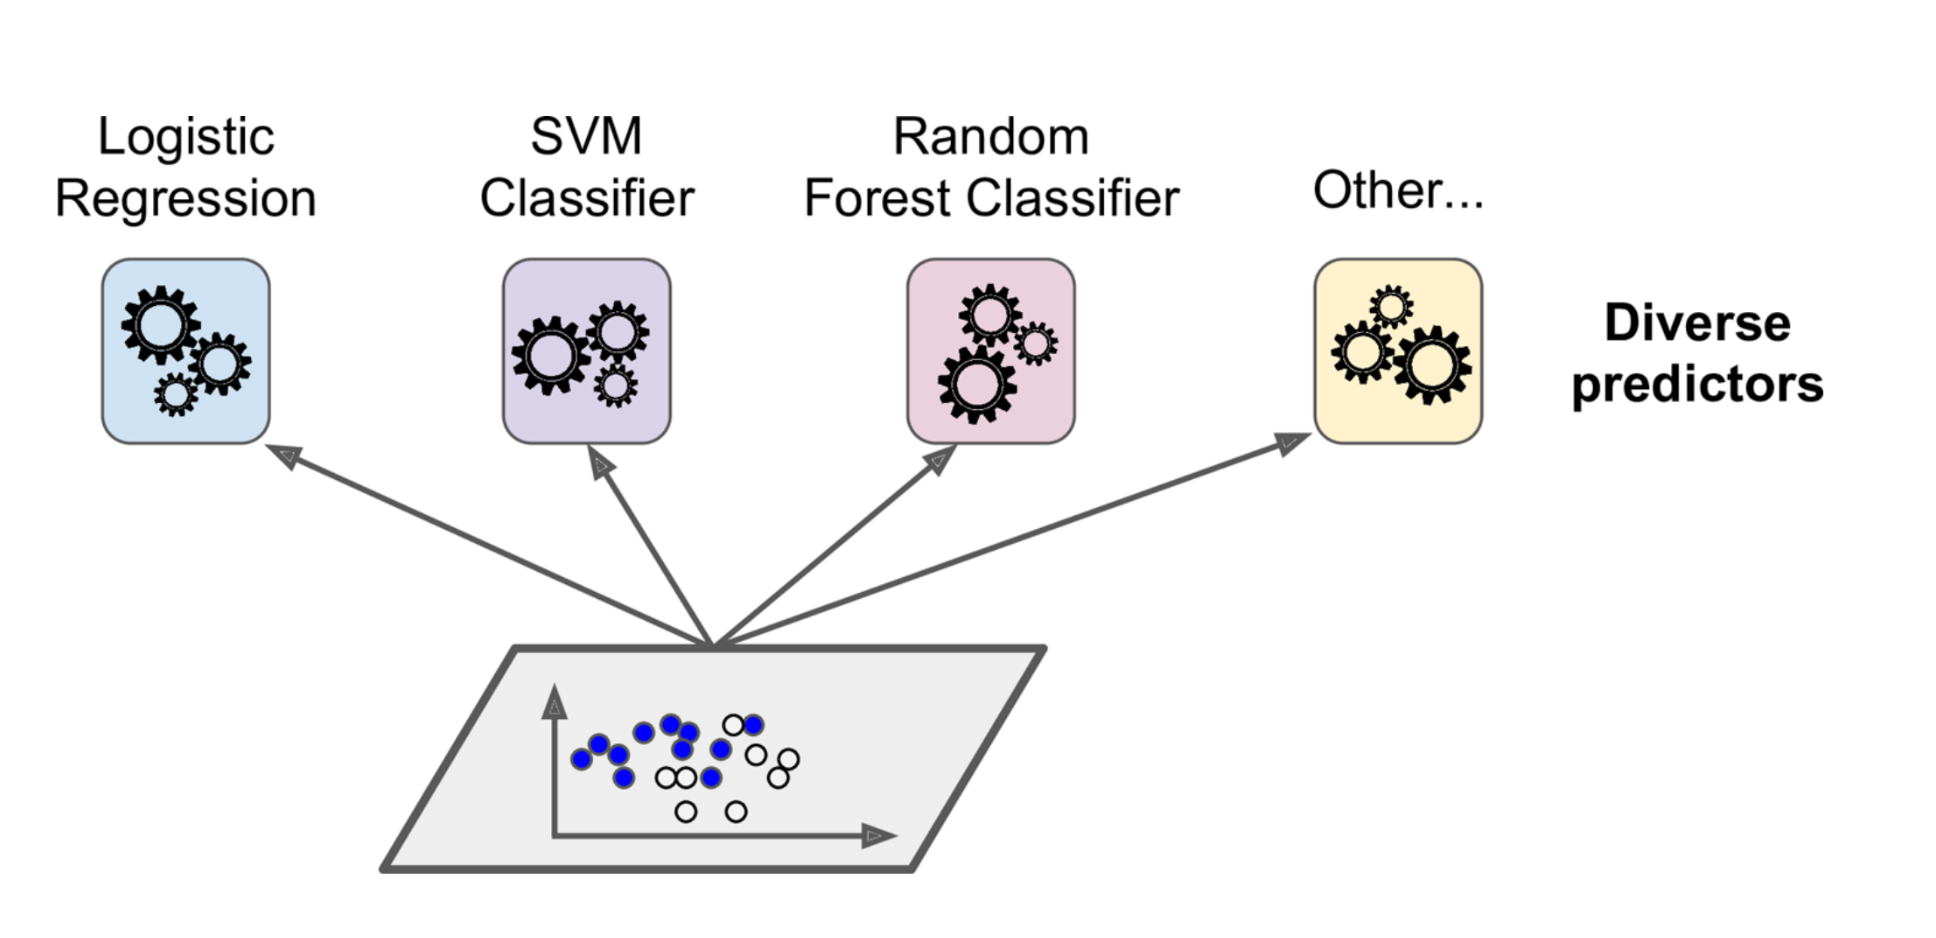

### Strategie głowowania
- Hard Voting / Majority Vote - Głosowanie Większości
- Co zrobić gdy będzie równowaga?
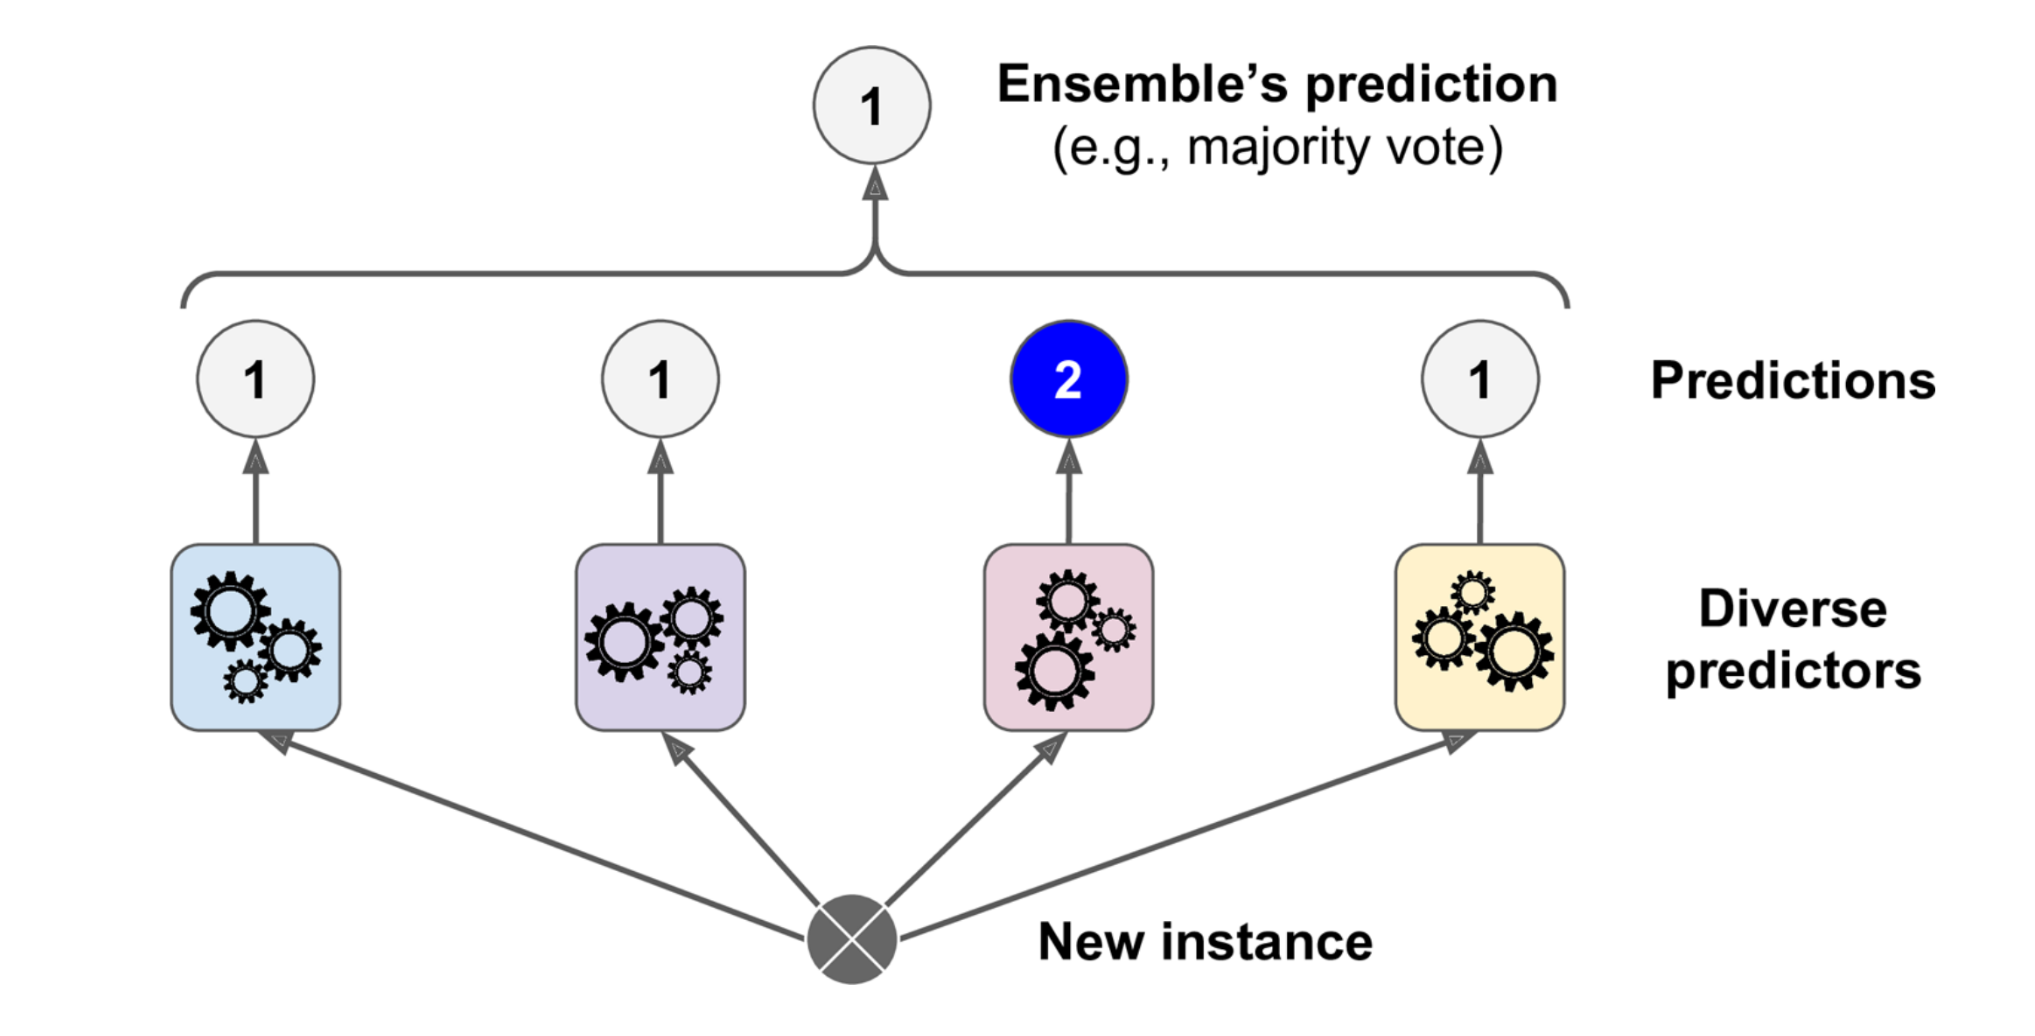

### Ciekawa charakterystyka
- Ensemble zbudowane z kiepskich klasyfikatorów / regresorów może działać całkiem dobrze (jeśli tych modeli jest dużo)
- Pod warunkiem, że klasyfikatory są niezależne
  - Zwykle nie są bo są uczone na tych samych danych ...

### Ensemble przykład, dane

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Ensemble, przykład, uczenie

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

# lista modeli do klasyfikacji
# voting clf odpali procesy uczące współbieżnie dla wszystkich modelo
# każdy model oddaje "głos" na swoją predykcję i wygrywa predykcja z największa ilością głosów
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

### Ensemble, przykład, predykcja

In [81]:
print(voting_clf.predict(X_test))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


### Ensemble, porównanie

In [82]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
# można zobaczyć, że jest lekka poprawa

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### Strategia głosowania: Hard Voting
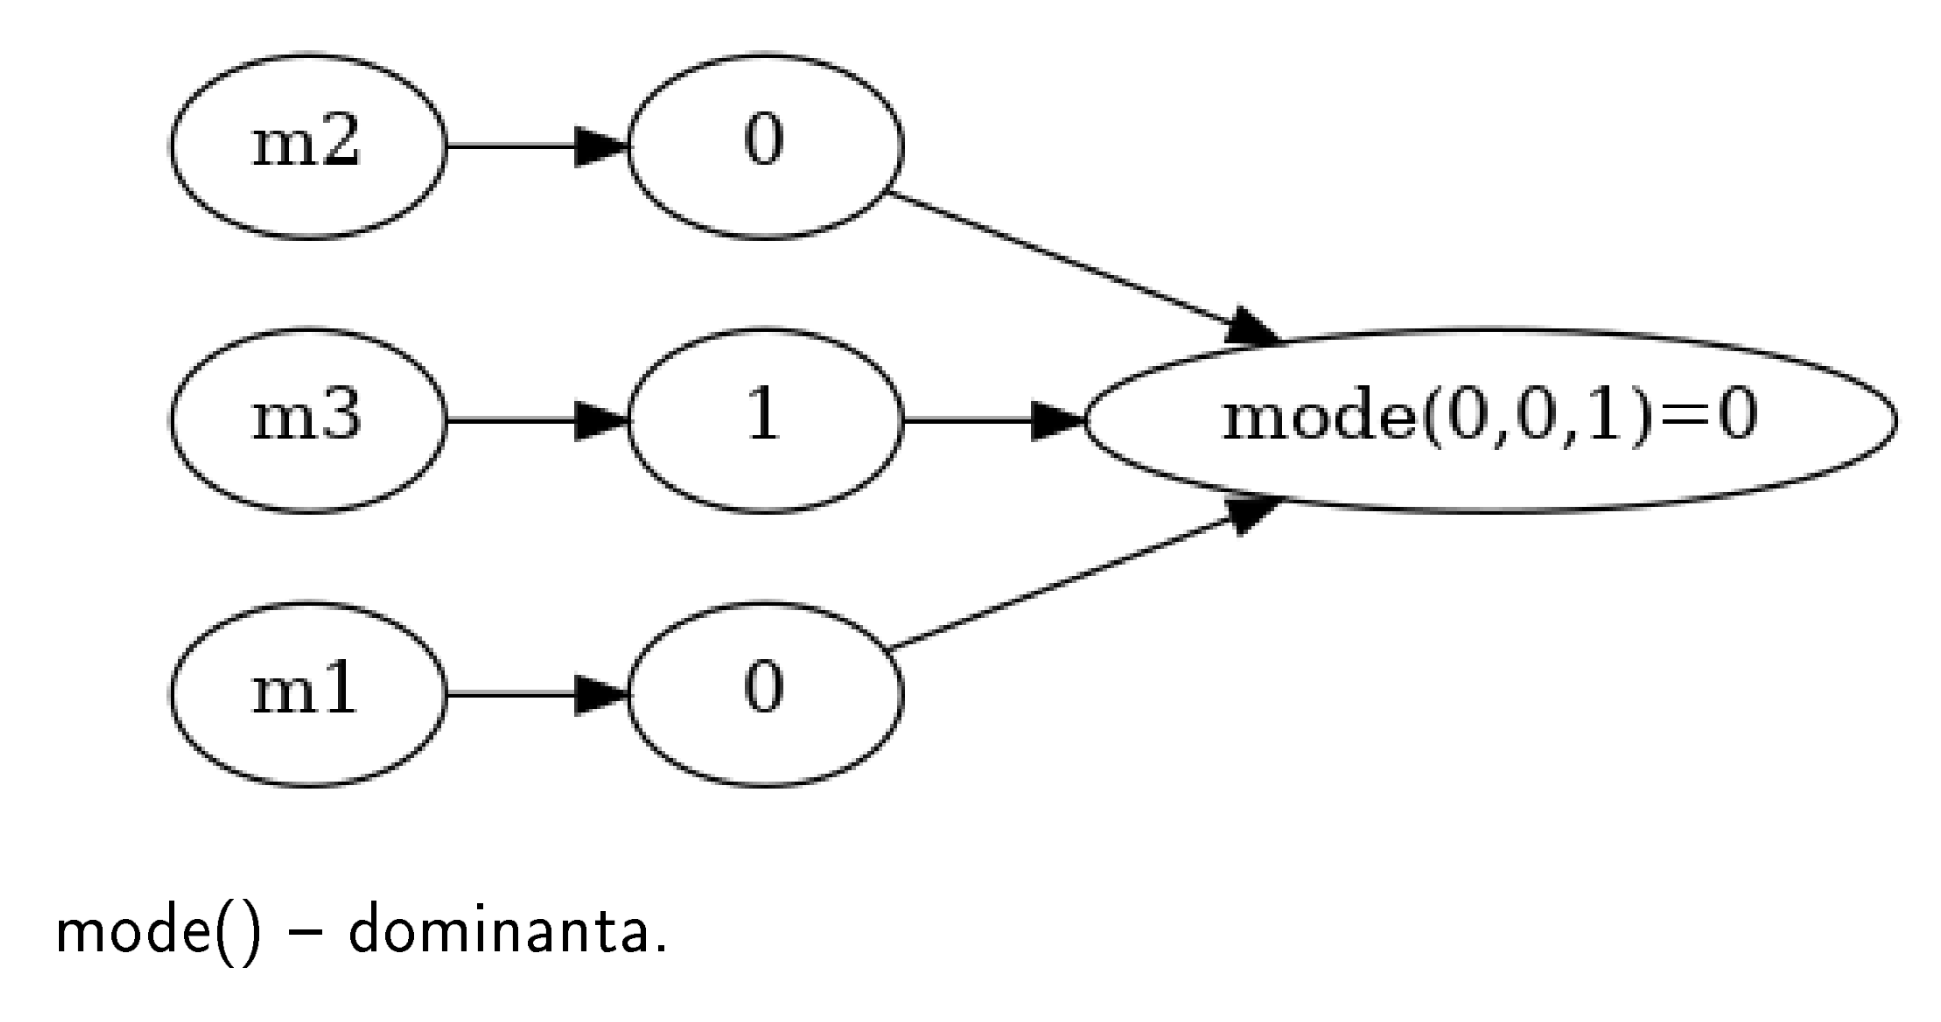

### Strategia głowsowania: Soft Voting
- Każdy predykator musi dostarczyć prawdopodobieństwo klasyfikacji **.predict_proba()**
- Prawdopodobieństa dla każdej klasy są uśredniane
- Wygrywa klasa z największym uśredniodym prawdopodobieństwem

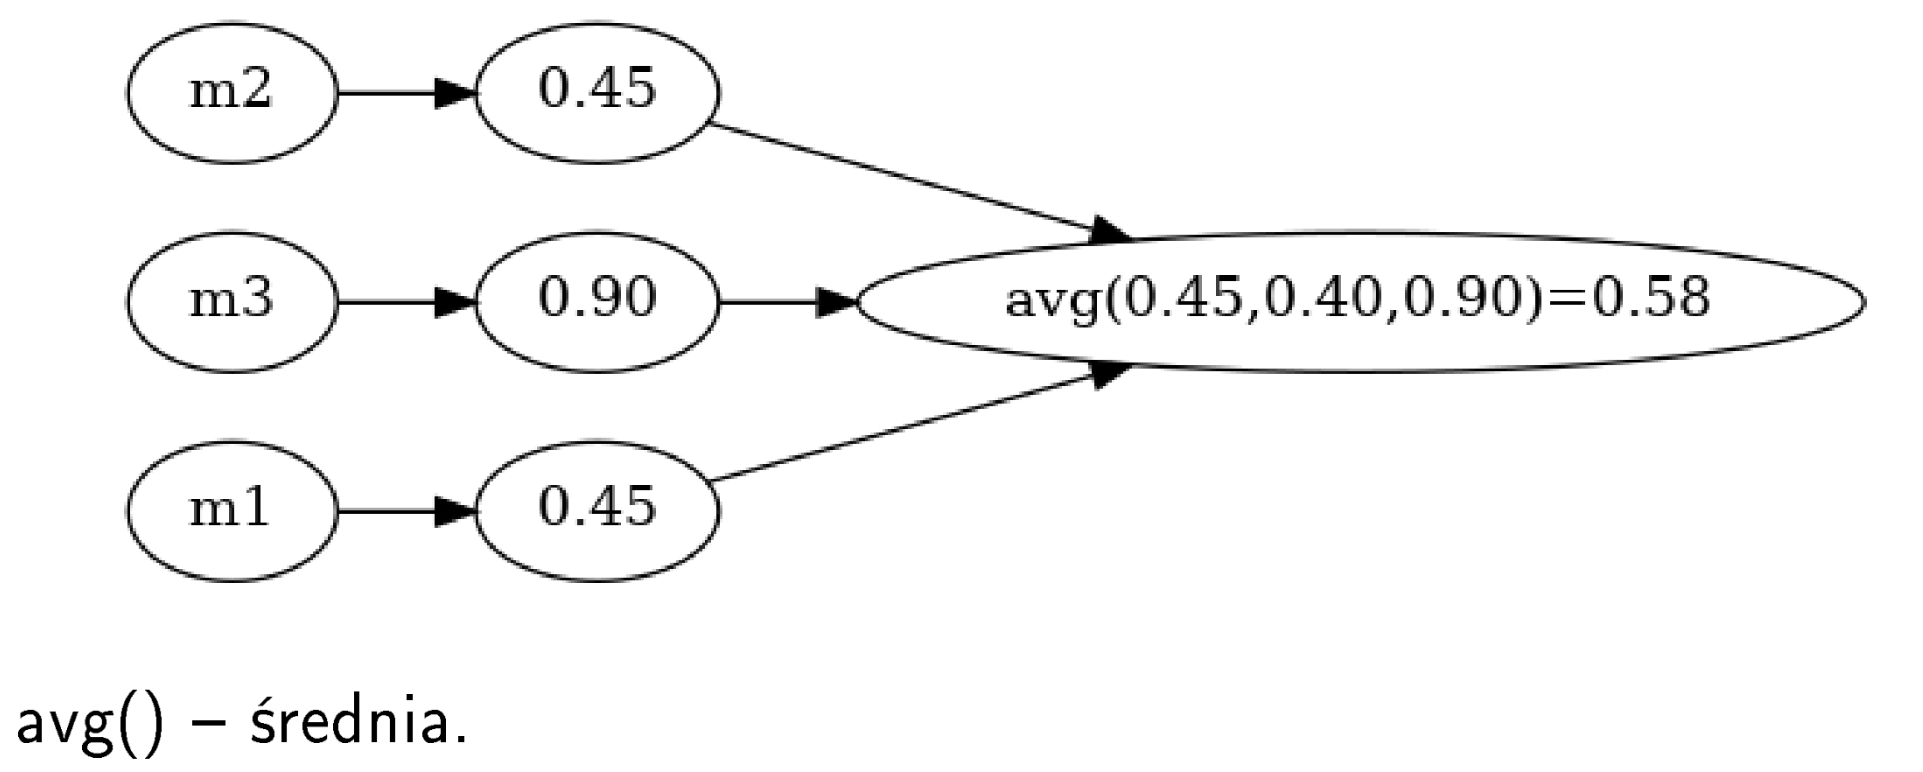

### Ensamble, Soft Voting, uczenie i predykcja

In [83]:
log_clf = LogisticRegression(solver='lbfgs')
rnd__clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

### Ensamble, Soft Voting, porównanie
Zwykle klasyfikator **SOFT** dostarcza lepsze wyniki niż hard voting

In [84]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


### Bagging i Pasting: ensemble inaczej, samplowanie
Samplowanie:
- z powtórzeniami (with replacement) - Bagging - bootstrap aggregating, *bootstrap = True*
- bez powtórzeń (without replacement) - Pasting, *bootstrap=False*
- Wygrywa dominanta. Dobrze się skaluje. Dowolny klasyfikator
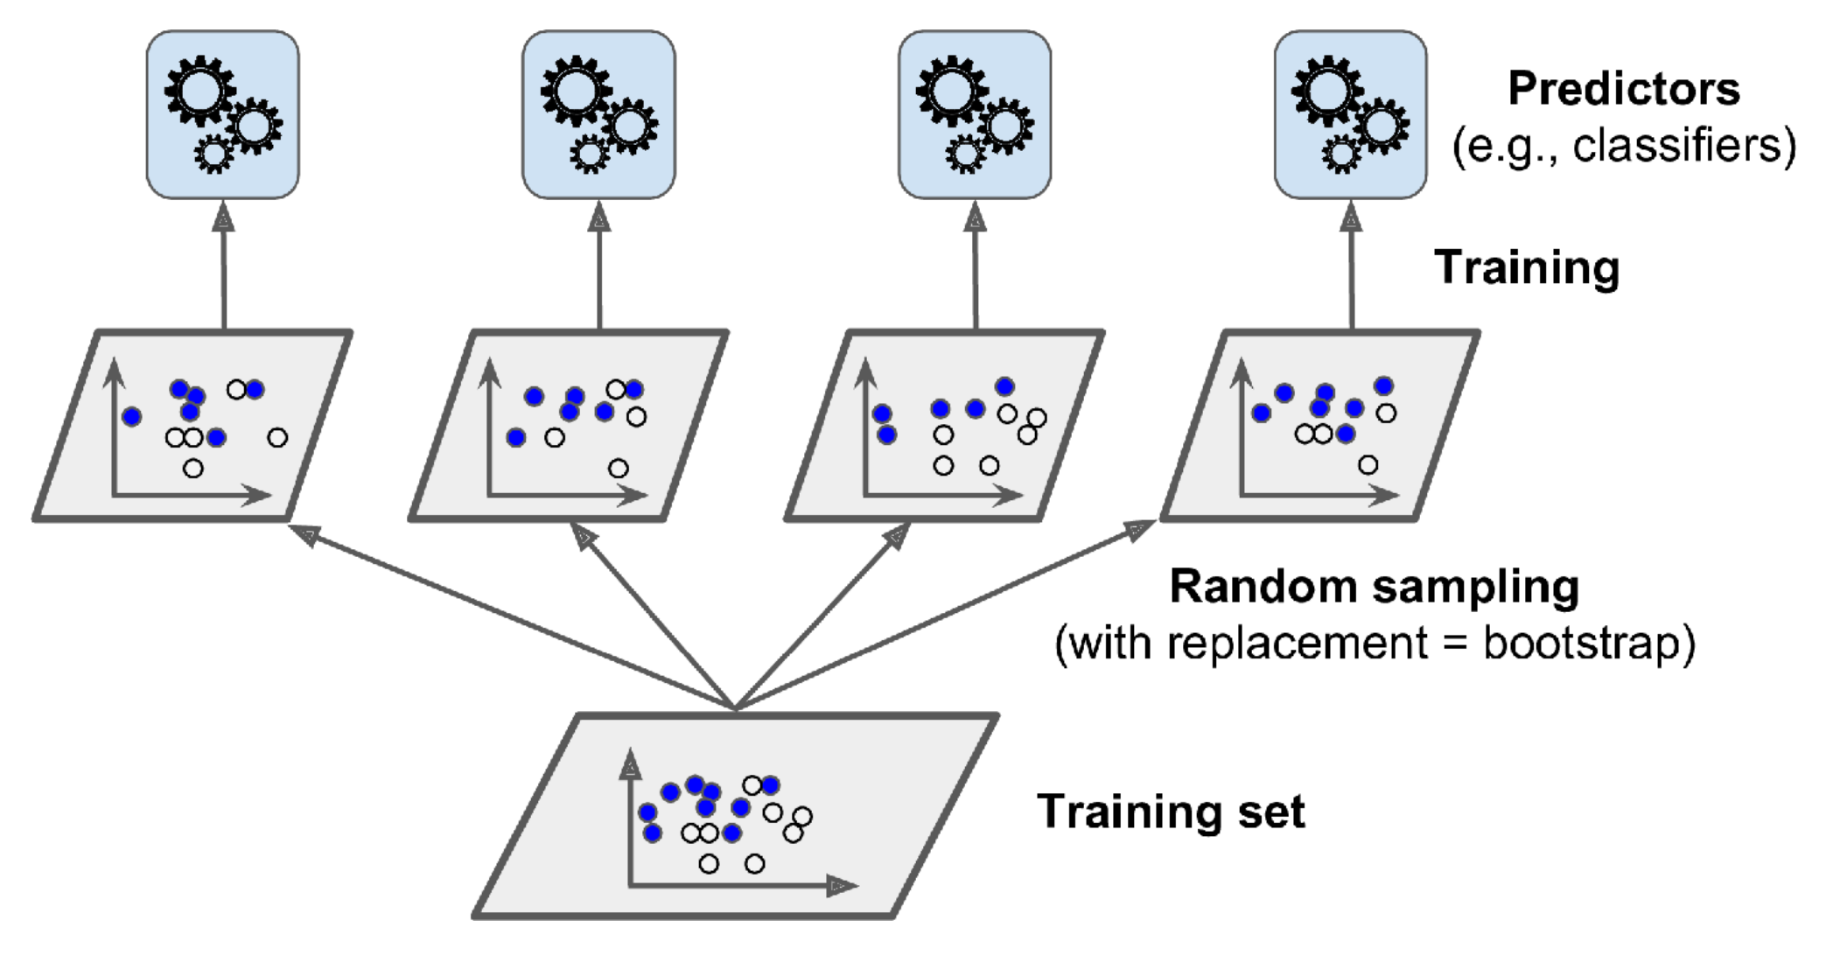

### Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


max_samples - liczba instancji do wylosowania, bezwzględna (tutaj: 100 instancji) albo procentowo [0,1]
- uwaga 1 vs 1.0 w Pythonie, liczba instancji: 1  vs 100%

### Bagging, porównanie
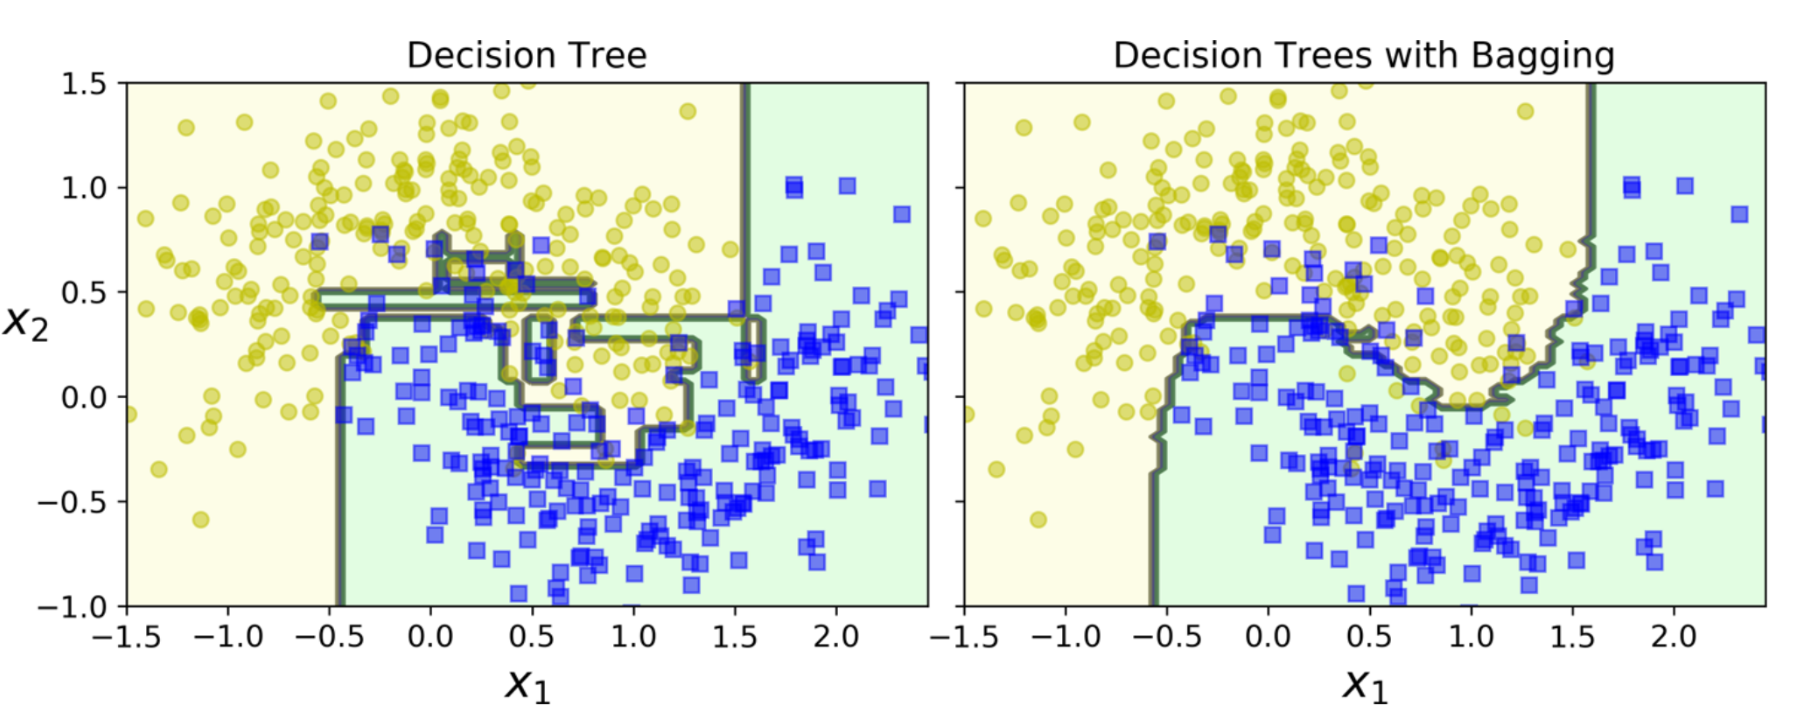

### Bagging, ewaluacja
- Niektóre instancje są używane wielokrotnie, nawet dla tego samego predykatora.
- Niektóre instancje nie są w ogóle używane : *out-of-bag-37%*
- Można ich użyć do ewaluacji jako zbiór testujący
- scikit-learn może to zrobić automatycznie do określenia dokładności (*accuracy*)
- **Uwaga** - predykatów musi być dużo

In [87]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    oob_score=True , bootstrap=True, random_state=40)
bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
# oob_score to wykorzystuje próbi OOB do oceny wydajności, czyli te próbki, które nie zostały użyte do trenowania DANEGO klasyfikatora

0.8986666666666666


In [88]:
print(bag_clf.oob_decision_function_[:5])

[[0.32275132 0.67724868]
 [0.34117647 0.65882353]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]]


### Wybór/sampling cech
Umożliwia uczenie predykatora na podstawie losowo wybranych cech
- z/bez powtórzeń: *bootstrap+features=True/False
- max_features - liczba cech do wylosowania
  - bezwzględna np. 100 albo
  - procentowo [0,1] np. 0.7
- Random patches: Wybór instancji i cech
  - max_samples=0.5, max_features=0.7
- Random Subspaces: wszystkie instancje i wybór cech:
  - *bootsrap=False, max_samples=0.1, bootsrap_features=True, max_features=0.7*

## Random Forest

### Random Forest
- Droga na skróty, zamiast *BaggingClassifier+DecisionTreeClassifier*
- Bagging + Drzewa decyzyjne, max_samples=1.0
- Hiperparametry z *BaggingClassifier i DecisionTreeClassifier*
- Dodatkowo: nie wyszukuje cech do podziału węzła spośród wszystkich, ale z losowo wybranego podzbioru - większa różnorodność


In [89]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

### Pomiar ważności cech

In [90]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)
print(rnd_clf.feature_importances_)
# sumują się do 1.0

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682
[0.11249225 0.02311929 0.44103046 0.423358  ]


- Sumują się do 1.0

### Boosting
- Trenowanie wielu słabych modeli
- Każdy kolejny model skupia się bardziej na tych przypadkach, które były źle klasyfikowane przez poprzednie modele,
- Na koniec wszystkie modele są ważone i agregowane w celu uzyskania finalnej predykcji.
- **Kilka kiepskich modeli -> jeden dobry model**

### AdaBoost
- Technika sekwencyjna, porównanie zrównoleglanie z Bagging/Pasting?
- Każdej instancji i predykatowi przypisana jest waga
- Wagi są modyfikowane
- Po nauczeniu wykorzystywane są wszystkie predyktory
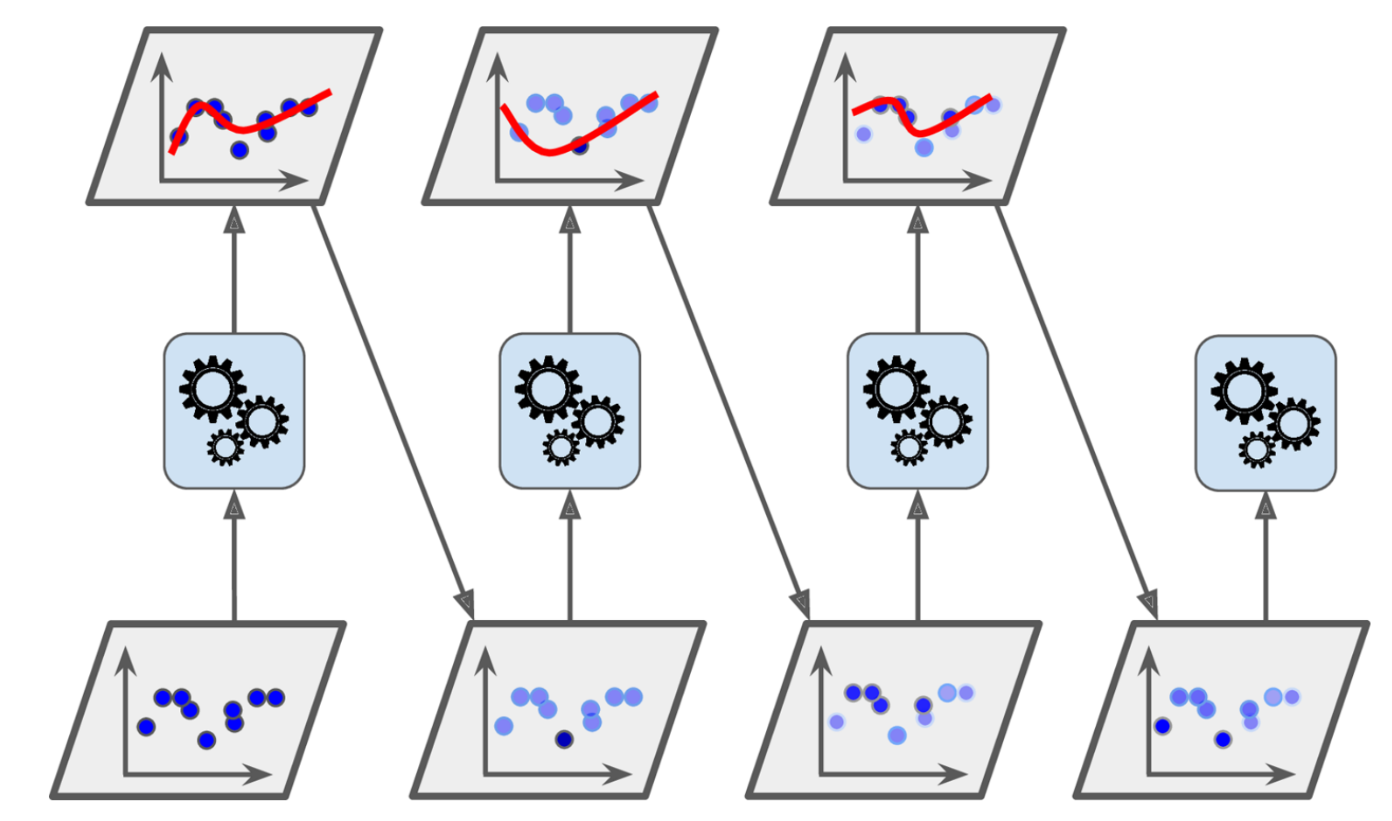

### AdaBoost
1. Początkoa waga każdej instancji: 1/m, m - liczba instancji
  - Większa waga = insancja częściej używana
2. Uczenie predyktora
3. Oecna predyktora + określenie wagi predyktora (lepszy -> większa waga)
4. Wagi zwiększane dla błędnie sklasyfikowanych instancji.
5. Jeżeli jeszcze jeden predyktor to idź do: 2
6. Użyj wszystkich predyktorów (ensemble) z wagami proporcjonalnymi do oceny (głosowanie większościowe z wagami predyktorów)

### AdaBoost, przyklad

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

# Domyślnie klasyfikatorem jest DecisionTreeClassifier(max_depth=1)


0.9533333333333334


### AdaBoost, przykład

In [92]:
X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(SVC(kernel='linear', probability=True), n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.9066666666666668


### Gradient Boosting
- Sekwencyjny
- Następny predyktor stara się poprawić błędy poprzedniego

### Gradient Boosting, na piechotę

In [93]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.69538652]


### Gradient Boosting, prościej

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
grad.fit(X, y)
print(grad.predict(X_new))

[0.69538652]


- Taki sam wynik jak poprzednio :)
- *learning_rate* - szybkość uczenia, domyślnie 0.1 (zmniejszanie udziału kolejnego estymatora do 10%) tutaj przyspieszamy, bo tylko 3 estymatory.

### Gradient Boosting, szybkość uczenia

In [95]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42, learning_rate=1.0)
gbrt.fit(X, y)
print(gbrt.predict(X_new))

[0.69538652]


In [96]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42, learning_rate=0.1)
gbrt.fit(X, y)
print(gbrt.predict(X_new))

[0.32684359]


### Gradient Boosting

In [97]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, random_state=42, learning_rate=0.1)
gbrt.fit(X, y)
print(gbrt.predict(X_new))
# Teraz już wynik jest git

[0.71359803]


- niska prędkość uczenia - potrzeba więcej regresorów

### Stacking - blender: osobny model do agregacji predykcji
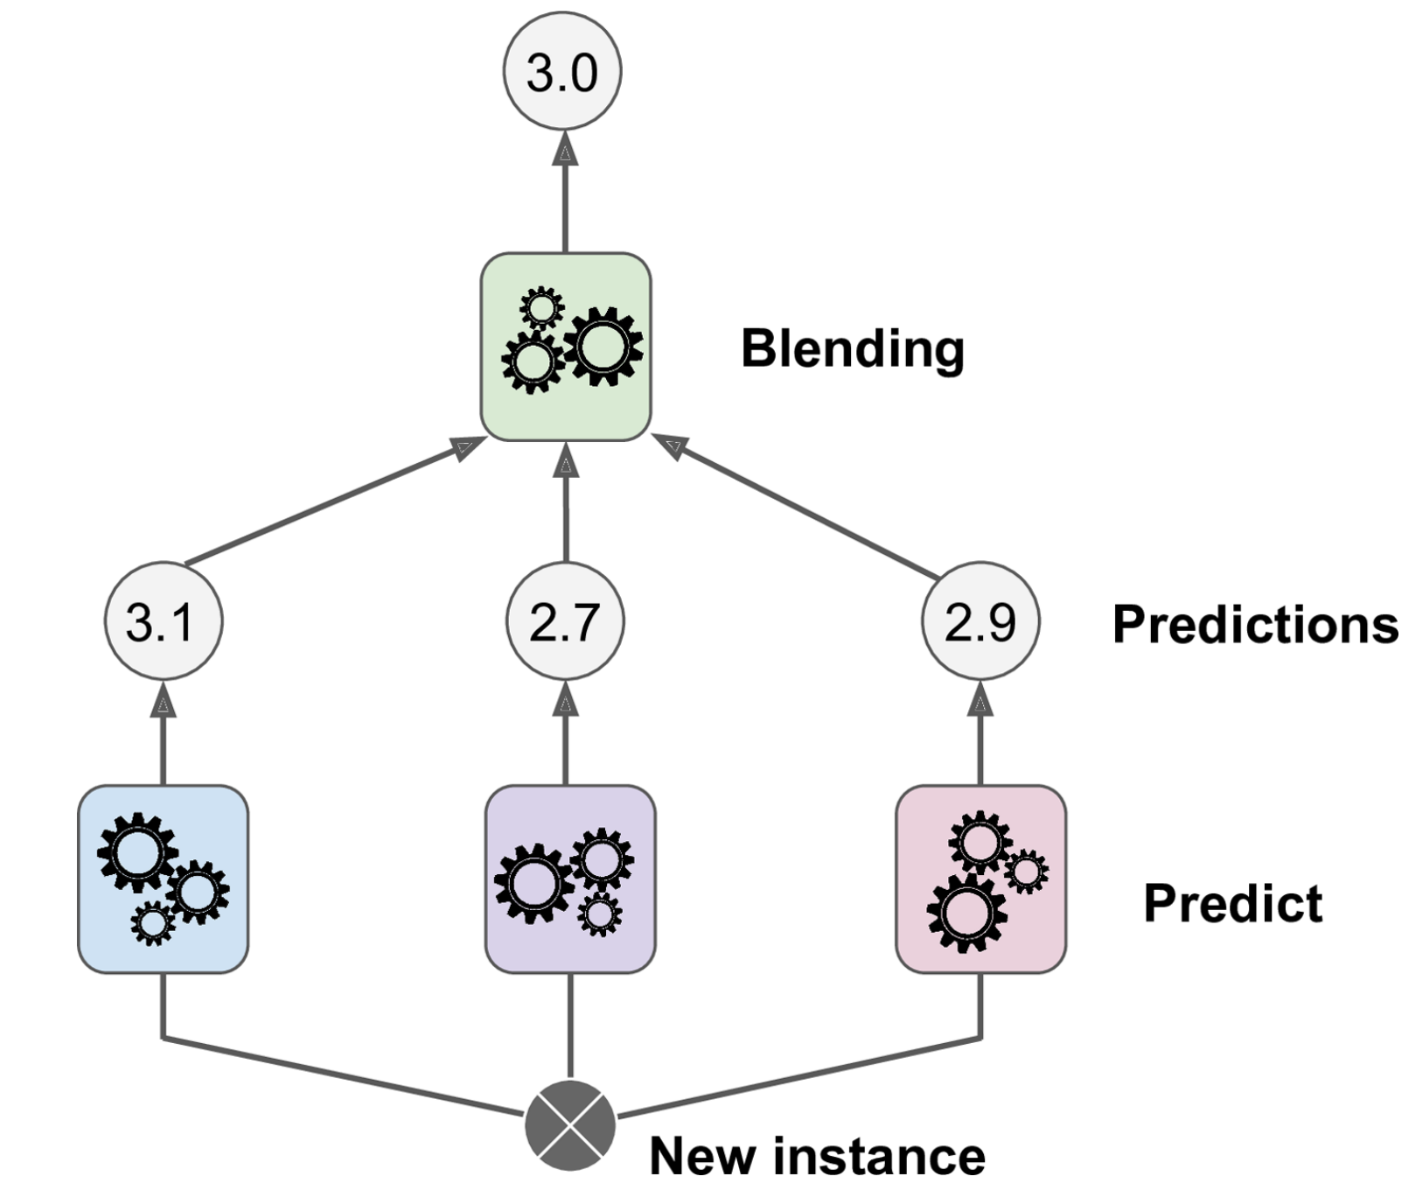

### Stacking, uczenie modeli
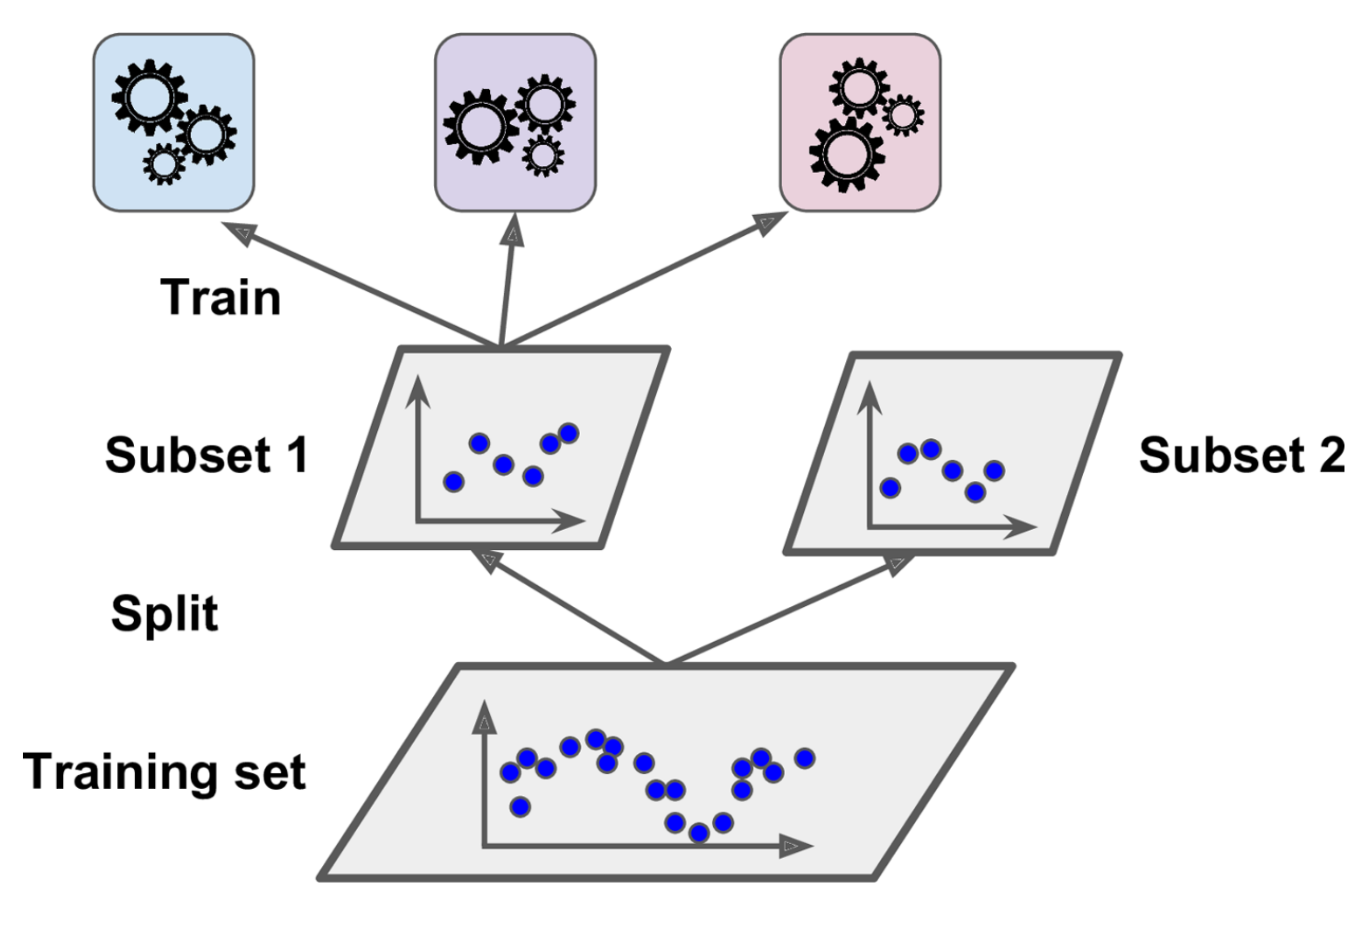

### Stacking, uczenie blendera
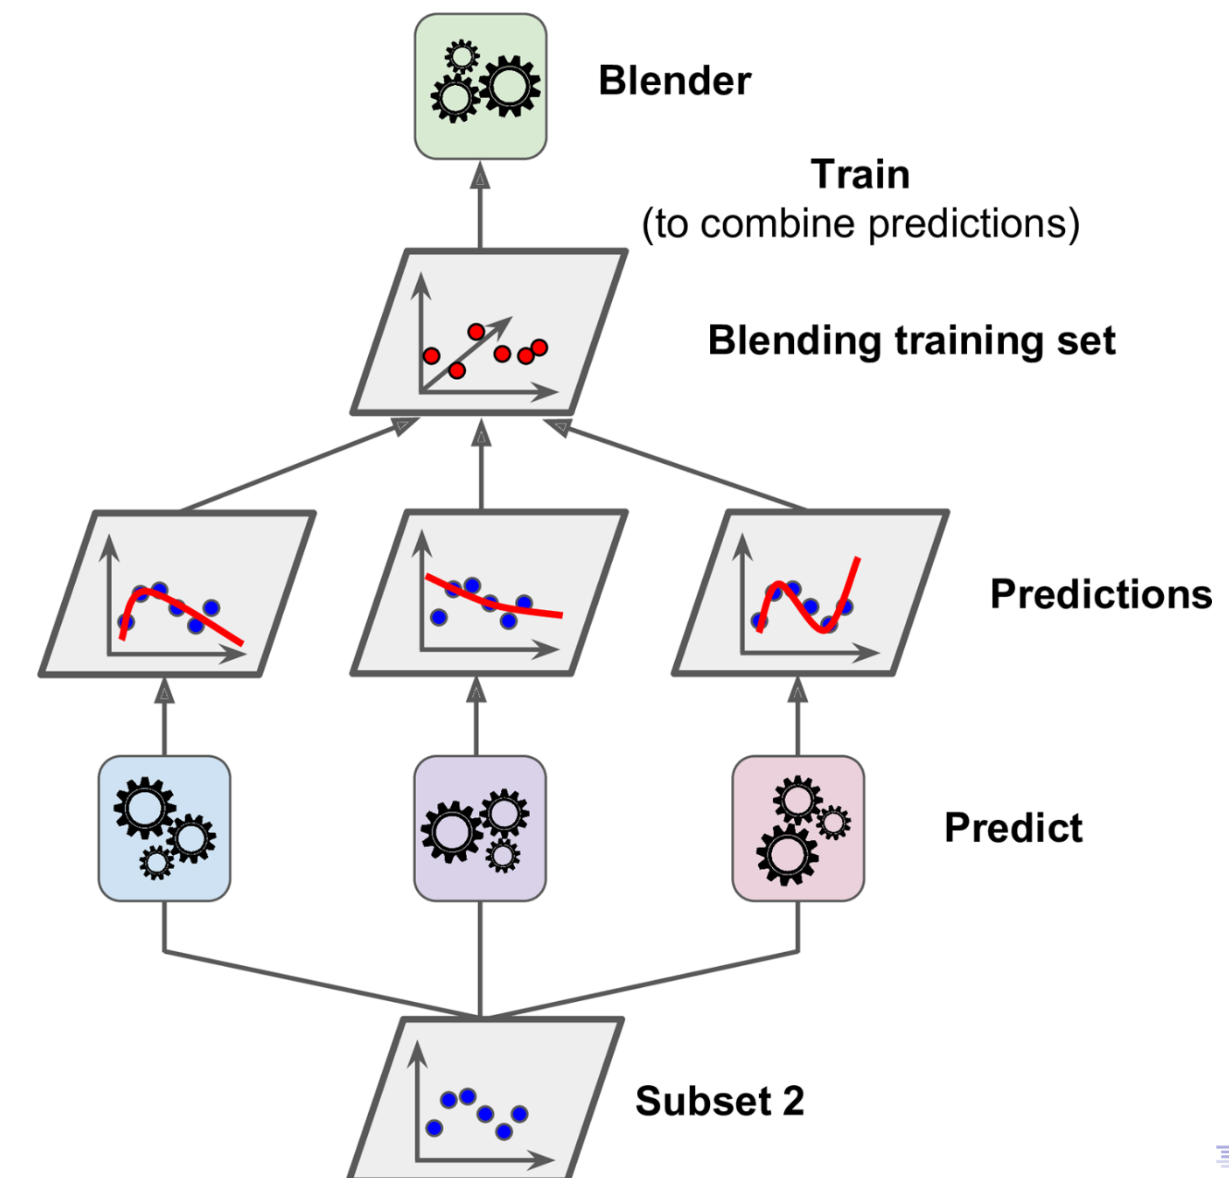


### Stacking, wiele blenderów
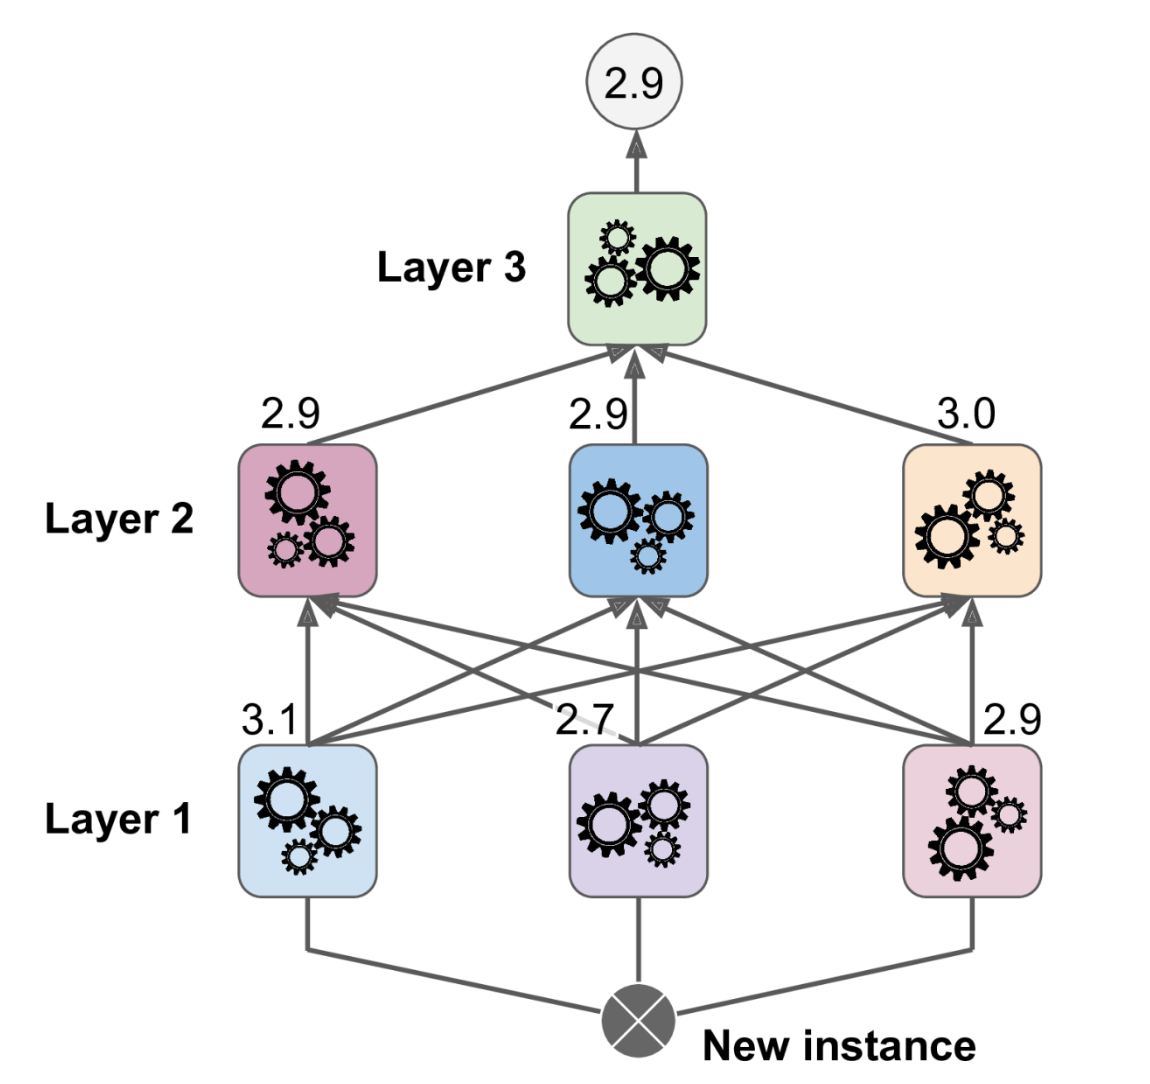

### Stacking, scicit-learn
- [sklearn.ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)
- [sklearn.ensemble.Stacking.Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

Używana jest walidacja krzyżowa do trenowania modeli

## Podsumowanie uczenia nadzorowanego

### Błąd generalizacji, uogólnienia modelu
#### Obciążenia, bias
- Tendencja do uczenia się tych samych błędów.
- Różnica pomiędzy wartością docelową, a prognozą modelu
- Zbyt prosty model
- Underfitting
#### Zmienności, Variance
- Uczenie się losowych zmian/szumu
- Nadmierna wrażliwość na małe różnice danych uczących
- Zbyt złożonyt model
- Overfitting
#### Nieredukowalny, Irreductible error
- Wynika z zaszumienia dancyh
- Trzeba oczyścić dane

### Błąd generalizacji
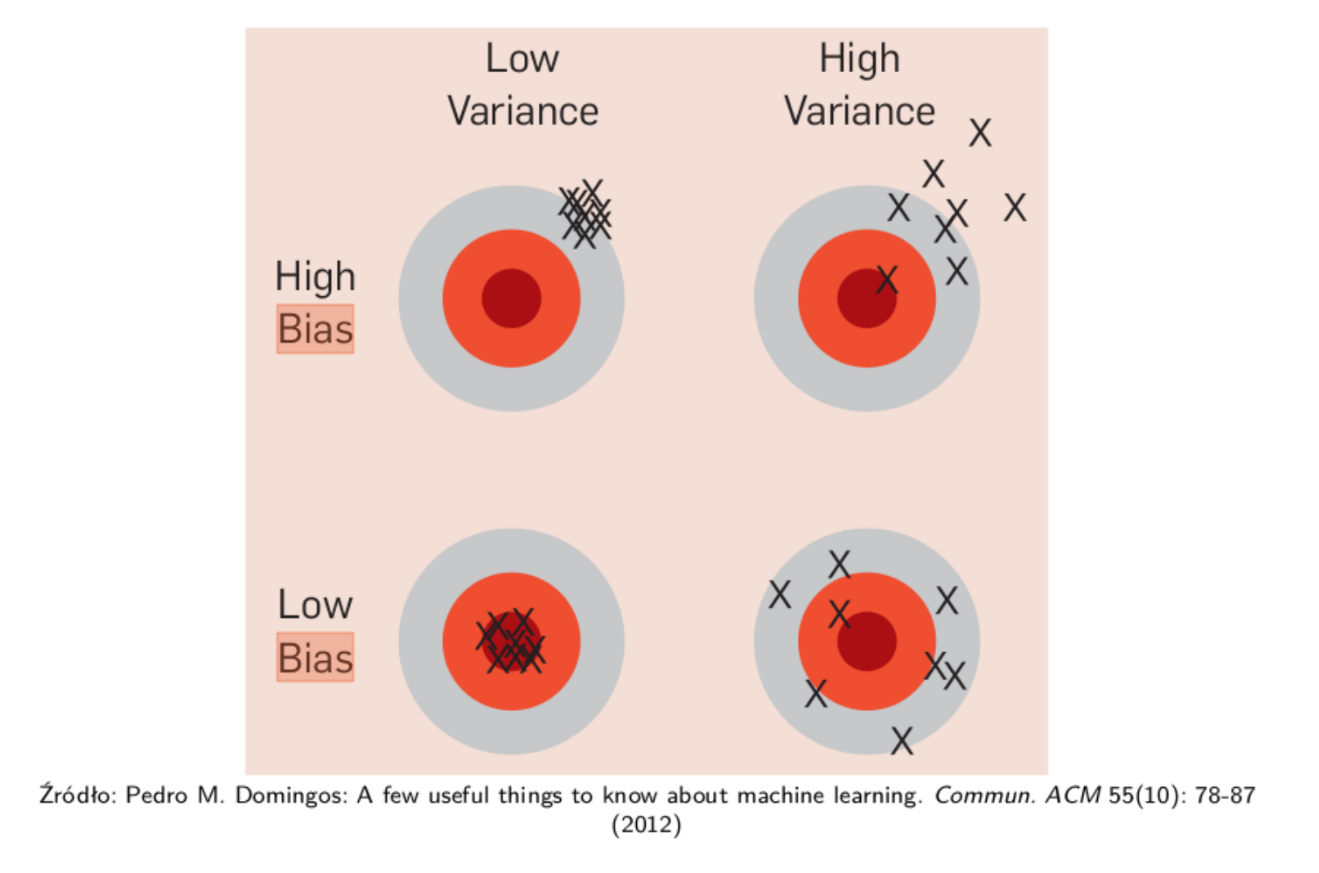

### Bias-Variance tradeoff
[Wikipedia: Bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
- Zwiększenie złożoności modelu zwiększa jego wariancję i zmniejsza jego obiążenie
- Zmniejszenie złożoności modelu zwiększa jego obciążenie i zmniejsza jego wariancję
- Kiedy model staje się zbyt skomplikowany może dojść do przeuczenia
  - model uczy się też odchyleń nie mających wpływu na realny trend
- Regularyzacja: ograniczenie modelu - zmniejszenie overfittingu - np. redukcja stopnia wielomianu, ograniczenie wartości parametrów
  - również osiągalna za pomocą hiperparametrów danego modelu np. ograniczenie głębokości drzewa decyzyjnego


### Bias-Variance tradeoff
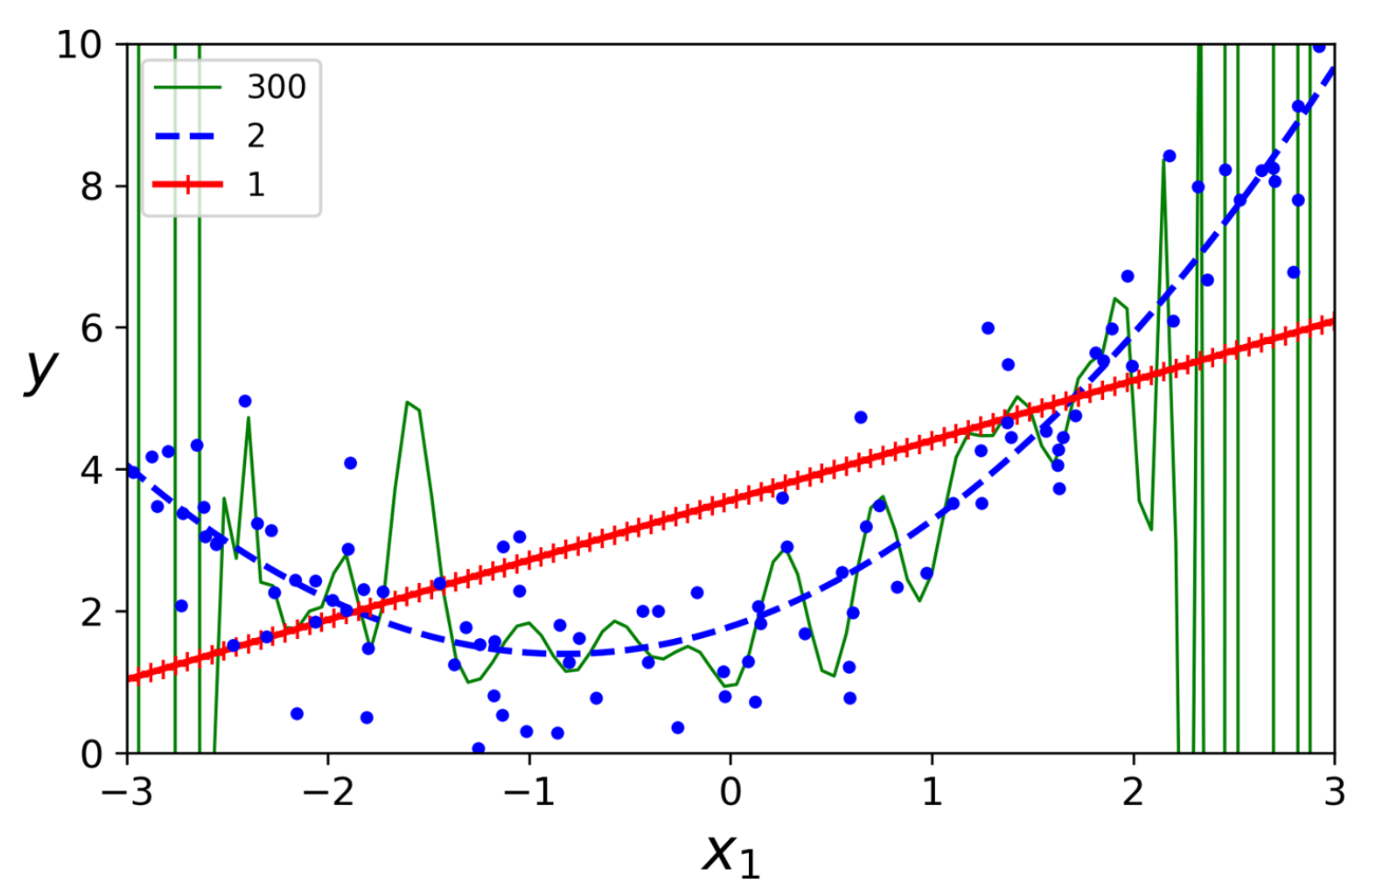

### Podsumowanie dot. metryk
- Confusion Matrix
  - Dokładność (Accuracy)
  - Precyzja (Precision)
  - Czułość (Recall)
  - F1
- RMSE / MSE

### Różne regressory
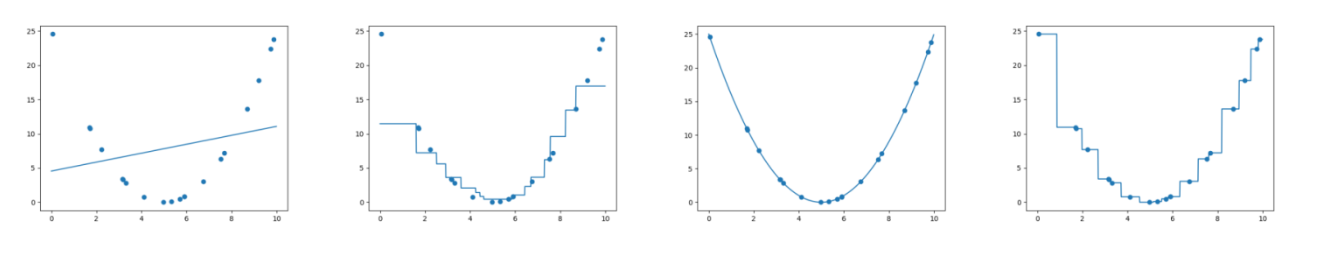